https://github.com/mohamadnajjari


Image histogram equalization is a technique used in image processing to enhance the contrast of an image by redistributing the intensity values. The goal is to make the pixel intensities more evenly distributed across the entire range of possible values. This can be particularly useful when an image has a limited range of intensities, causing it to appear washed out or lacking detail.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image as dark contrast image
# cv2.imread: This is a function from the OpenCV library used to read an image from a file.
# cv2.IMREAD_GRAYSCALE indicates that the image should be read in grayscale mode, meaning it will be converted to a single-channel image with pixel values representing intensities of gray.
image = cv2.imread('party.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
# define a simple utility function that uses Matplotlib to display a grayscale image.
# This function provides a convenient way to display grayscale images with a specified title, making the code more modular and readable. You can use this function by calling it and passing the appropriate title and image as arguments. 
def display_image(title, image):
    plt.imshow(image, cmap='gray') 
    plt.title(title) 
    plt.axis('off')
    plt.show()

In [ ]:
# This function allows you to easily calculate the histogram of a grayscale image and obtain the histogram values and bin edges
# Calculates the histogram of the flattened version of the input image. The 256 specifies the number of bins, and [0, 256] sets the range of values for the bins.
# The result is a tuple containing hist (histogram values) and bins (bin edges).
def calculate_histogram(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    return hist, bins

In [ ]:
# This function allows you to easily plot a histogram with specified attributes, such as title, color, and axis labels. 
# Plots the histogram using Matplotlib, where hist is the histogram values, and color specifies the color of the plot.
def plot_histogram(title, hist, bins, color):
    plt.plot(hist, color=color)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# This function provides a comprehensive analysis of the input image and its equalized version, including visualizations of the images and their histograms.
def equalization(image):
    image_hist, image_bins = calculate_histogram(image) # Calculates the histogram of the input image using the previously defined function

    image = image.astype(np.uint8) # Converts the image to uint8 for consistent interpretation.
    display_image('Input iamge', image)
    plot_histogram('Input Image Histogram', image_hist, image_bins, 'blue')

    pdf = image_hist / np.sum(image_hist) # Calculates the Probability Density Function (PDF) of the input image.
    cdf = np.cumsum(pdf) # Calculates the Cumulative Distribution Function (CDF) of the input image.

    equalized_image = np.interp(image.flatten(), image_bins[:-1], cdf * 255).reshape(image.shape).astype(np.uint8) # Applies histogram equalization to the input image.
    equalized_image_hist, equalized_image_bins = calculate_histogram(equalized_image)

    display_image('Equalized iamge', equalized_image)
    plot_histogram('Equalized Image Histogram', equalized_image_hist, image_bins, 'blue')

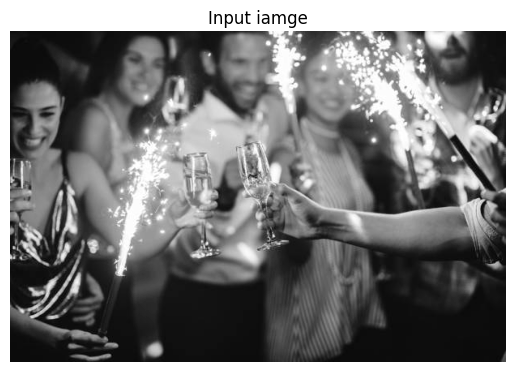

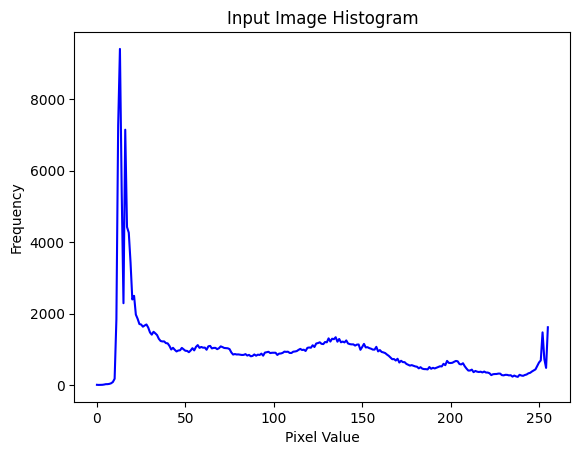

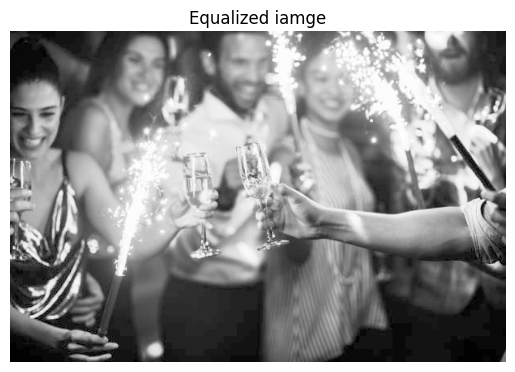

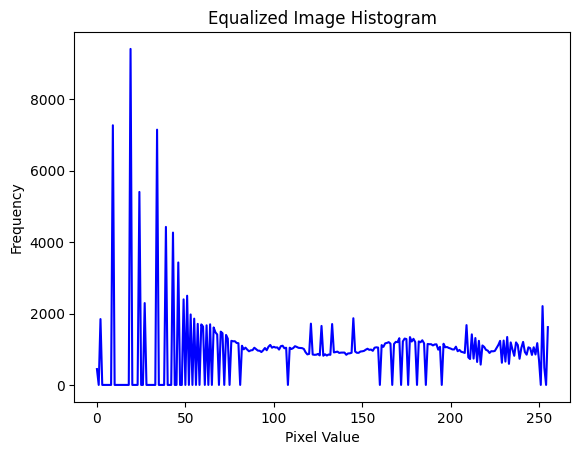

In [31]:
# run the program
equalization(image)